In [1]:
### importing the necessary packages and the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [6]:
data =pd.read_csv("social_media_vs_productivity.csv")
data

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [13]:
data.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

In [3]:
data.describe(include="all")

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,30000,30000,27235.000000,30000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000,30000,30000.000000,30000.000000,30000.000000,27270.000000
unique,NaN,3,6,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,Male,Education,NaN,TikTok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
freq,NaN,14452,5055,NaN,6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20979,22602,NaN,NaN,NaN,NaN
mean,41.486867,NaN,NaN,3.113418,NaN,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,NaN,NaN,1.999300,15.557067,10.360655,4.964901
std,13.835221,NaN,NaN,2.074813,NaN,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,NaN,NaN,1.410047,9.252956,7.280415,2.121194
min,18.000000,NaN,NaN,0.000000,NaN,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,1.639566,NaN,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,NaN,NaN,1.000000,8.000000,4.541872,3.363580
50%,41.000000,NaN,NaN,3.025913,NaN,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,NaN,NaN,2.000000,16.000000,10.013677,4.951049
75%,53.000000,NaN,NaN,4.368917,NaN,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,NaN,NaN,3.000000,24.000000,15.300809,6.581323


In [4]:
data.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [15]:
data["daily_social_media_time"].fillna(value=data["daily_social_media_time"].median(),inplace=True)
data["perceived_productivity_score"].fillna(value=data["perceived_productivity_score"].median(),inplace=True)
data["actual_productivity_score"].fillna(value=data["actual_productivity_score"].median(),inplace=True)
data["stress_level"].fillna(value=data["stress_level"].median(),inplace=True)
data["sleep_hours"].fillna(value=data["sleep_hours"].median(),inplace=True)
data["screen_time_before_sleep"].fillna(value=data["screen_time_before_sleep"].median(),inplace=True)
data["job_satisfaction_score"].fillna(value=data["job_satisfaction_score"].median(),inplace=True)



In [16]:
data.isnull().sum()

age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [17]:
cont_data=data.select_dtypes(include=["int64","float64"])

In [38]:
print(cont_data.columns)

Index(['age', 'daily_social_media_time', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score'],
      dtype='object')


In [19]:
cat_data=data.select_dtypes(include=["object"])

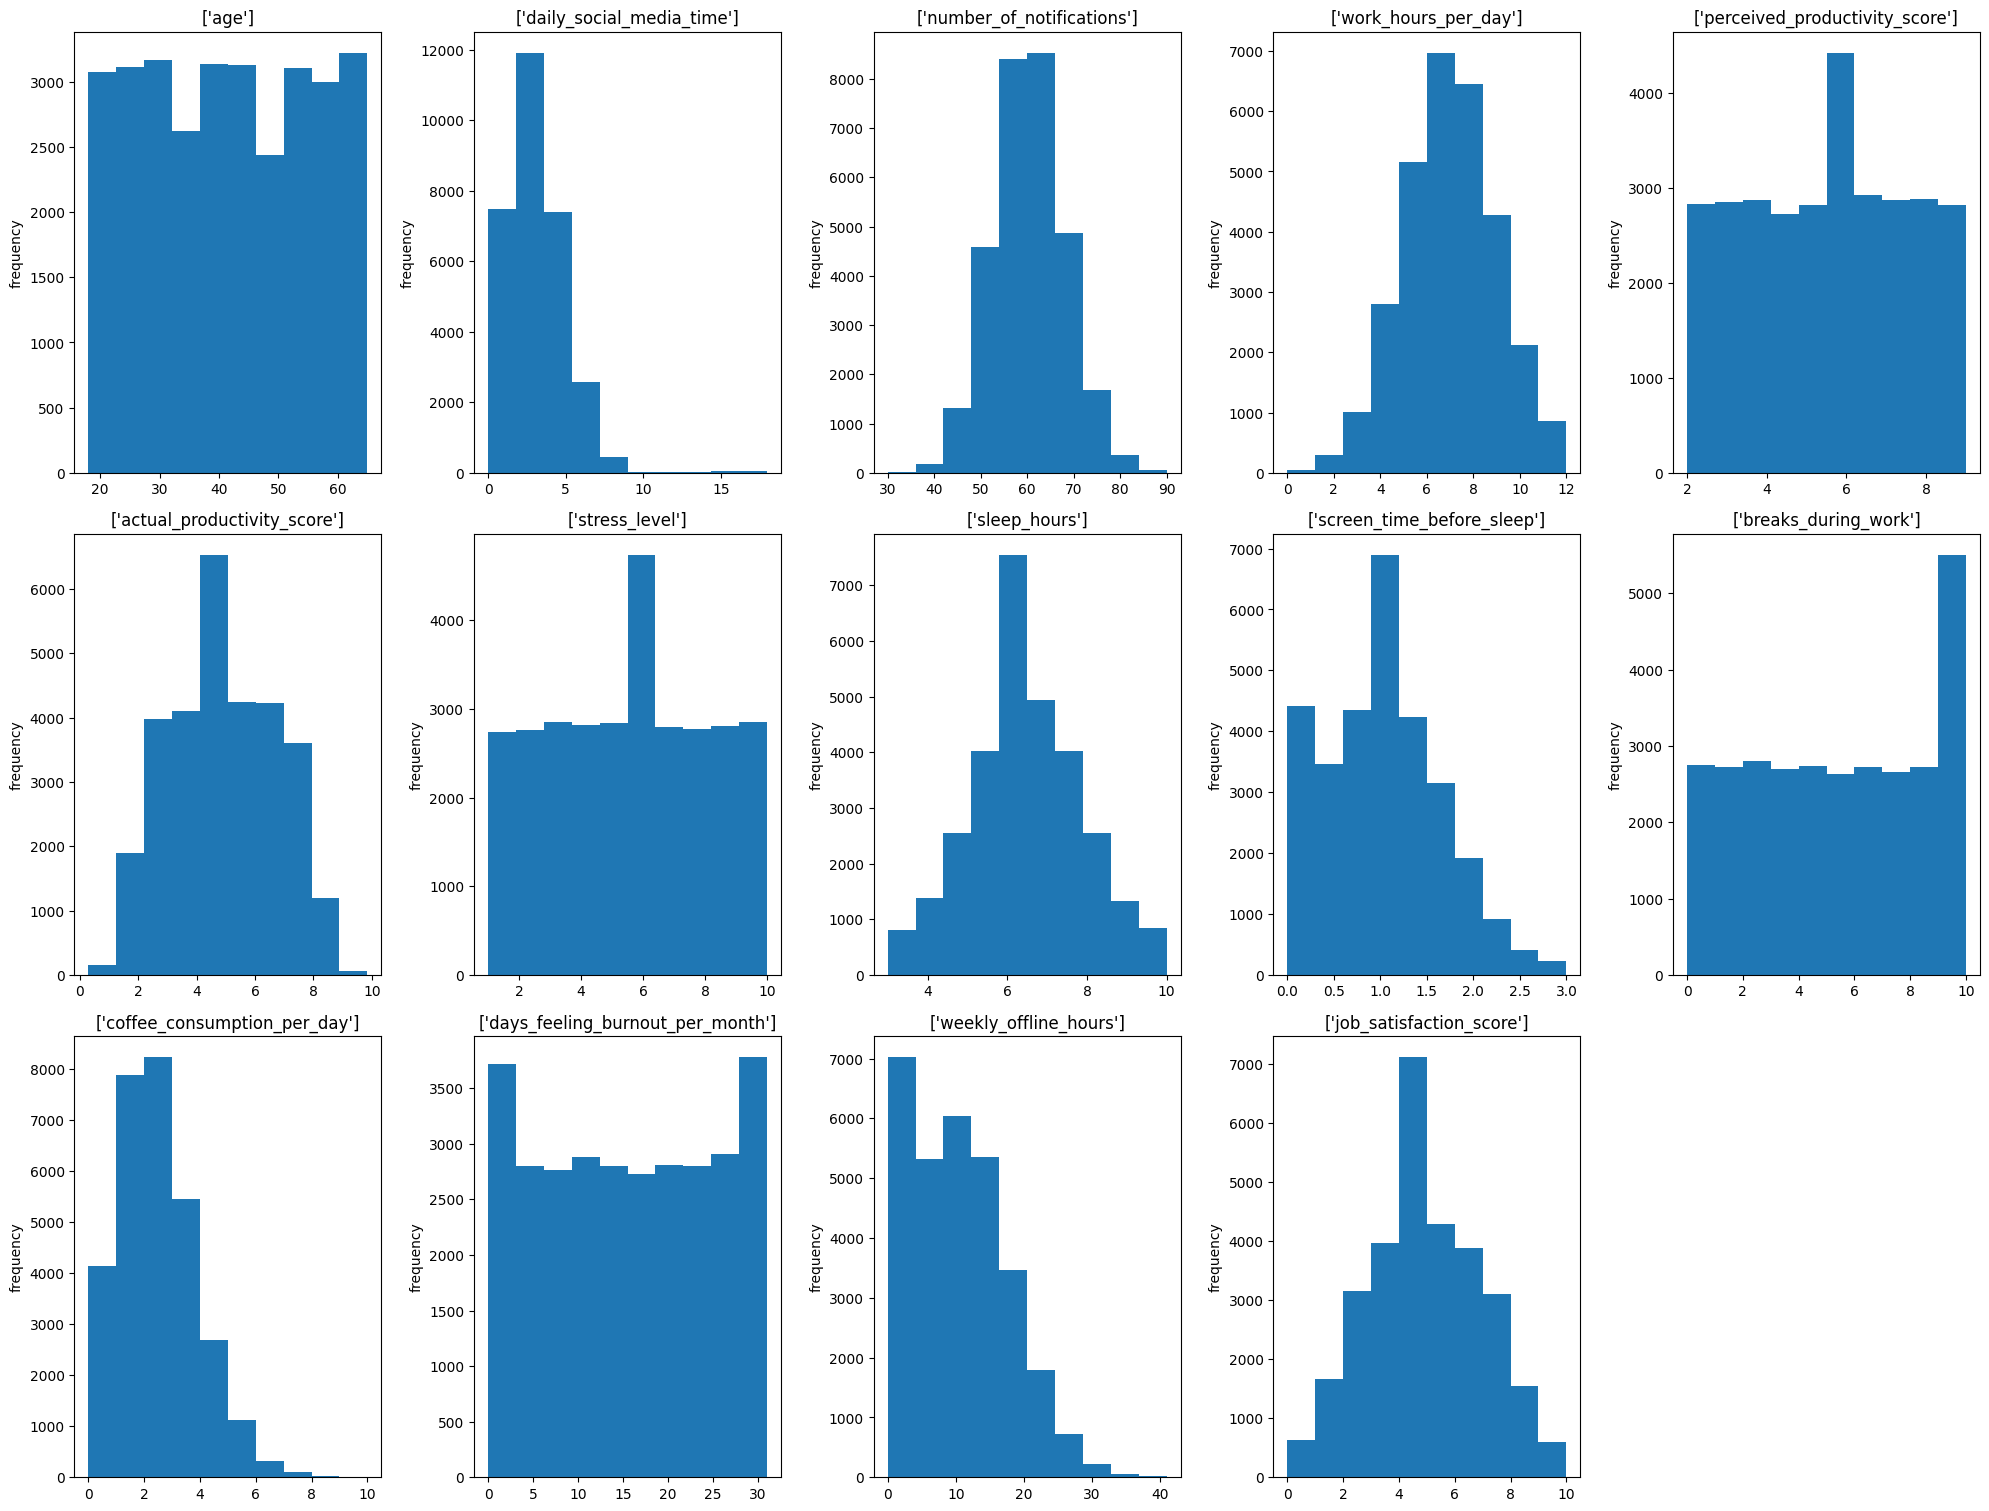

In [21]:

plt.figure(figsize=(20,20))
for i,col in enumerate(cont_data):
   plt.subplot(4,5,i+1)
   plt.hist(data[col])
   plt.title([col])
   plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()



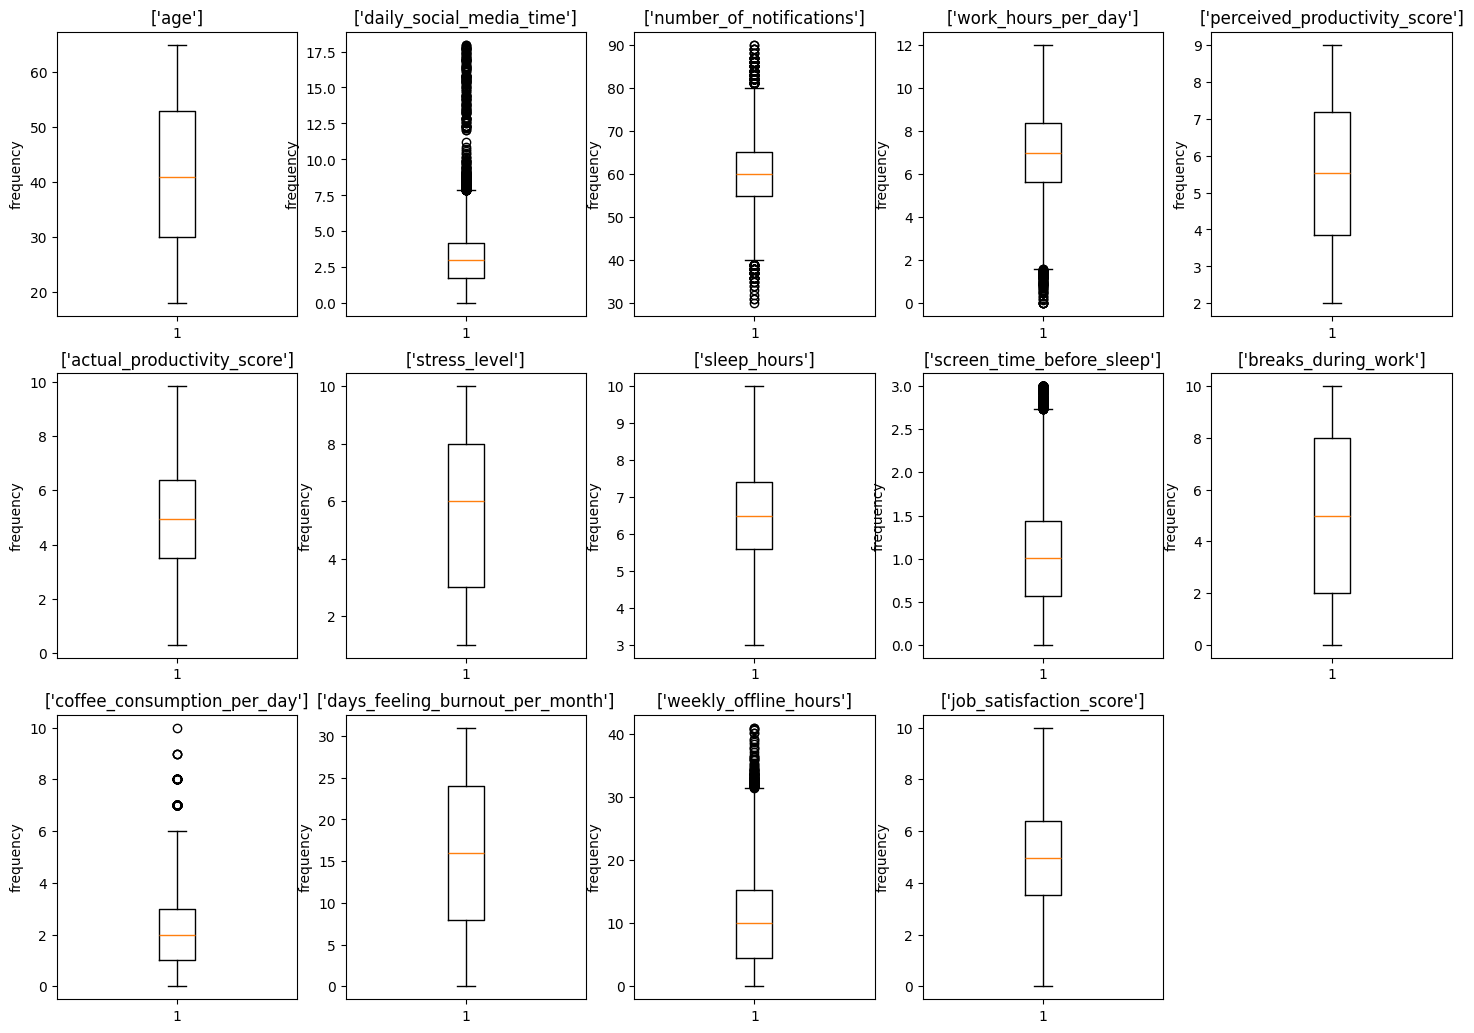

In [42]:
plt.figure(figsize=(18,17))
for i, col, in enumerate(cont_data):
    plt.subplot(4,5, i+1)
    plt.boxplot(data[col])
    plt.title([col])
    plt.ylabel(f"frequency")
plt.tight_layout
plt.show()

In [34]:
def remove_outliers(columns):
    for column in columns:
        Q3=cont_data[column].quantile(0.75)
        Q1=cont_data[column].quantile(0.25)
        IQR=Q3-Q1
        upper=Q3 + 1.5*IQR
        lower=Q1 - 1.5*IQR
        cont_data[column]=np.where(cont_data[column]>upper,upper,cont_data[column])
        cont_data[column]=np.where(cont_data[column]<lower,lower,cont_data[column])

In [35]:
data.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

In [44]:
remove_outliers(["daily_social_media_time","number_of_notifications","work_hours_per_day", "screen_time_before_sleep","weekly_offline_hours"])

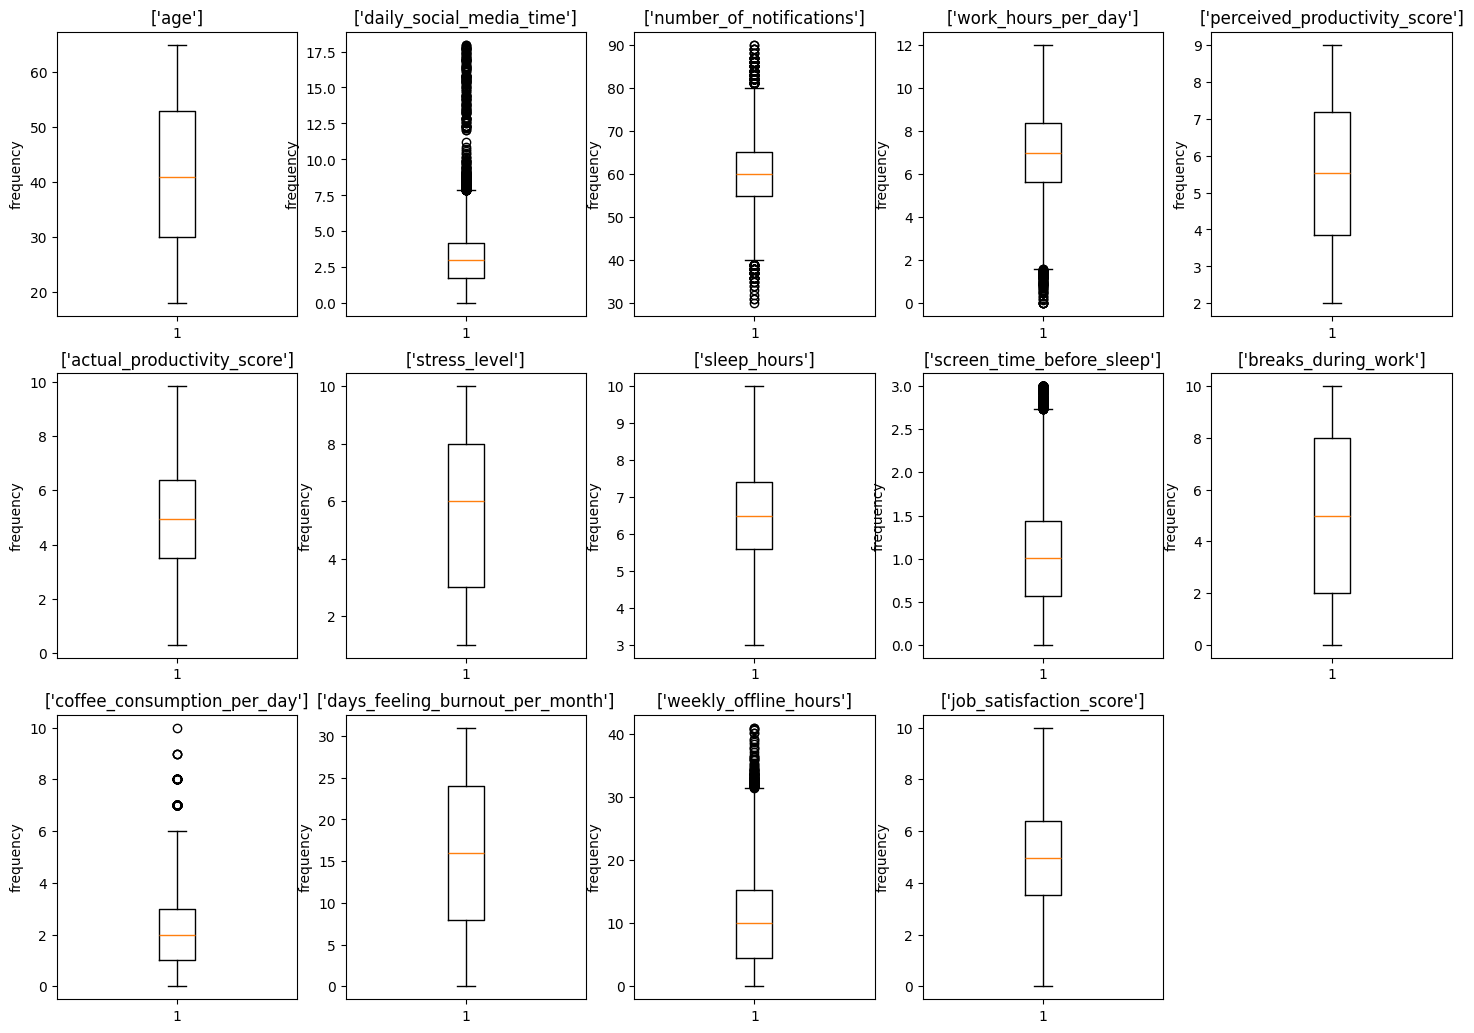

In [45]:
plt.figure(figsize=(18,17))
for i, col, in enumerate(cont_data):
    plt.subplot(4,5, i+1)
    plt.boxplot(data[col])
    plt.title([col])
    plt.ylabel(f"frequency")
plt.tight_layout
plt.show()